<a href="https://colab.research.google.com/github/valeriazv/G3Patrones/blob/main/Challenges/Challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Resolucion  de challenge 2}$$

Primero importamos las librerias que usaremos, junto con la base de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Importamos el archivo y visualizamos las primeras filas:
df_diag = pd.read_csv("DIAGNOSTICOS_POR_GRUPOS_DE_EDAD.csv", delimiter=";")

df_diag.head()



,PERIODO_DIAGNOSTICO,ESTABLECIMIENTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,SEXO,GRUPOS_POR_EDAD,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES
0,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 25 A 29 AÑOS,INFECCIÓN POR SALMONELLA,OTRAS INFECCIONES DEBIDAS A SALMONELLA,1
1,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,MENORES DE 1 AÑO,OTRAS INFECCIONES INTESTINALES BACTERIANAS ESP...,OTRAS INFECCIONES INTESTINALES BACTERIANAS,1
2,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,MASCULINO,DE 60 A 64 AÑOS,ABSCESO AMEBIANO DEL PULMÓN,AMEBIASIS,2
3,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,MASCULINO,DE 65 AÑOS A MÁS,"AMEBIASIS, NO ESPECIFICADA",AMEBIASIS,1
4,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 5 A 9 AÑOS,GIARDIASIS [LAMBLIASIS],OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROT...,2


Ahora obtendremos la informacion del dataframe, con esto sabremos si hay nulos y el tipo de data que manejamos. Podemo observar que hay 6049  elementos. Ademas, obtenemos stats de nuestros features cuantitativos.




In [ ]:
# Para obtener información básica del DataFrame y un breve análisis estadístico:
print(df_diag.info())

df_diag.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6049 entries, 0 to 6048
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PERIODO_DIAGNOSTICO    6049 non-null   int64 
 1   ESTABLECIMIENTO        6049 non-null   object
 2   DEPARTAMENTO           6049 non-null   object
 3   PROVINCIA              6049 non-null   object
 4   DISTRITO               6049 non-null   object
 5   UBIGEO                 6049 non-null   int64 
 6   FECHA_CORTE            6049 non-null   int64 
 7   SEXO                   6049 non-null   object
 8   GRUPOS_POR_EDAD        6049 non-null   object
 9   DIAGNOSTICOS_CIE       6049 non-null   object
 10  CATEGORIA_DIAGNOSTICO  6049 non-null   object
 11  TOTAL_PACIENTES        6049 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 567.2+ KB
None


,PERIODO_DIAGNOSTICO,UBIGEO,FECHA_CORTE,TOTAL_PACIENTES
count,6049.00,6049.00,6049.00,6049.00
mean,202301.00,150101.00,20230615.00,2.61
std,0.00,0.00,0.00,6.26
min,202301.00,150101.00,20230615.00,1.00
25%,202301.00,150101.00,20230615.00,1.00
50%,202301.00,150101.00,20230615.00,1.00
75%,202301.00,150101.00,20230615.00,2.00
max,202301.00,150101.00,20230615.00,247.00


Podemos observar que desde el primer hasta el septimo feature los datos son los mismos, entonces no nos dan informacion relevante, por lo que las podemos eliminar.


In [ ]:
df_diag = df_diag.iloc[:, 7:]
df_diag.head()

,SEXO,GRUPOS_POR_EDAD,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES
0,FEMENINO,DE 25 A 29 AÑOS,INFECCIÓN POR SALMONELLA,OTRAS INFECCIONES DEBIDAS A SALMONELLA,1
1,FEMENINO,MENORES DE 1 AÑO,OTRAS INFECCIONES INTESTINALES BACTERIANAS ESP...,OTRAS INFECCIONES INTESTINALES BACTERIANAS,1
2,MASCULINO,DE 60 A 64 AÑOS,ABSCESO AMEBIANO DEL PULMÓN,AMEBIASIS,2
3,MASCULINO,DE 65 AÑOS A MÁS,"AMEBIASIS, NO ESPECIFICADA",AMEBIASIS,1
4,FEMENINO,DE 5 A 9 AÑOS,GIARDIASIS [LAMBLIASIS],OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROT...,2


Analizaremos el feature TOTAL_PACIENTES. Como son valores numericos,  no es necesario una codificacion

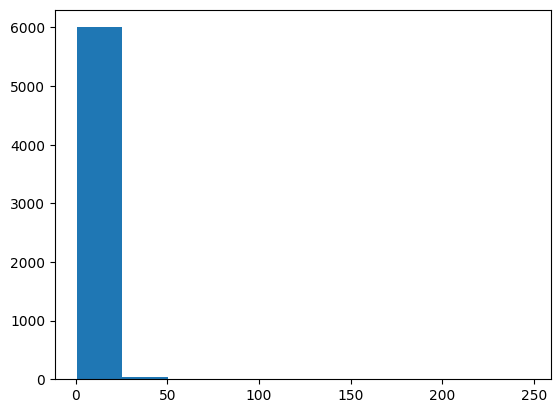

In [ ]:
plt.hist(df_diag["TOTAL_PACIENTES"])
plt.show()

Pero podemos notar que hay muchos casos en los que solo se ha diagnosticado a un solo paciente, esto no nos conviene porque tener un solo caso para muchas enfermedades no nos aporta en nuestro algoritmo de clasificacion, por lo que setearemos un umbral de almenos 4 diagnosticos, de lo contrarimo eliminaremos.

In [ ]:
df_diag = df_diag[df_diag['TOTAL_PACIENTES'] > 3]
df_diag.head()

,SEXO,GRUPOS_POR_EDAD,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES
73,FEMENINO,DE 25 A 29 AÑOS,VERRUGAS (VENÉREAS) ANOGENITALES,OTRAS ENFERMEDADES DE TRANSMISIÓN PREDOMINANTE...,4
92,FEMENINO,DE 60 A 64 AÑOS,VERRUGAS VÍRICAS,VERRUGAS VÍRICAS,4
93,FEMENINO,DE 65 AÑOS A MÁS,VERRUGAS VÍRICAS,VERRUGAS VÍRICAS,5
100,FEMENINO,DE 10 A 14 AÑOS,VERRUGAS VÍRICAS,VERRUGAS VÍRICAS,4
145,FEMENINO,DE 15 A 19 AÑOS,TIÑA DE LAS UÑAS,DERMATOFITOSIS,6


Ahora veremos como esta la estadistica

In [ ]:
df_diag.describe()

,TOTAL_PACIENTES
count,913.00
mean,9.80
std,14.05
min,4.00
25%,4.00
50%,6.00
75%,10.00
max,247.00


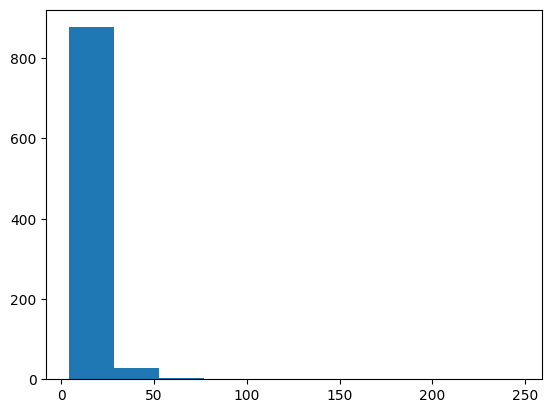

In [ ]:
plt.figure()
plt.hist(df_diag["TOTAL_PACIENTES"])
plt.show()

vemos el boxplot, podemos identificar varios outliers, pero cuando observamos sus contenidos,  vemos que son outliers que tienen sentido, como
por ejemplo  enfermedades relacionadas a la prostata son  muy comunes en hombres mayores, por lo que su valor no es descabellado

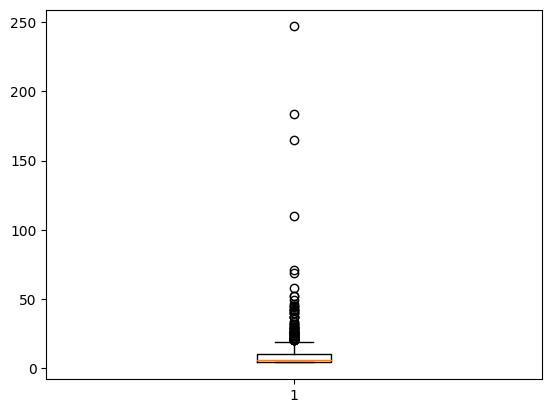

In [ ]:

plt.boxplot(df_diag["TOTAL_PACIENTES"])
plt.show()


Ahora analizaremos los demas features, teniendo en cuenta que el  grupo por edad se tendra que codificar.

Verificamos que en el feature GRUPOS_POR_EDAD  solo haya strings  que representen el rango de edades, y no otros strings.

In [ ]:
#Comprobamos que solo haya rangos en el feature
elementos_unicos = (df_diag["GRUPOS_POR_EDAD"].unique())

# Imprimir la lista de elementos únicos
print(elementos_unicos)

['DE 25 A 29 AÑOS' 'DE 60 A 64 AÑOS' 'DE 65 AÑOS A MÁS' 'DE 10 A 14 AÑOS'
 'DE 15 A 19 AÑOS' 'DE 45 A 49 AÑOS' 'DE 55 A 59 AÑOS' 'DE 50 A 54 AÑOS'
 'DE 5 A 9 AÑOS' 'DE 40 A 44 AÑOS' 'DE 35 A 39 AÑOS' 'DE 30 A 34 AÑOS'
 'DE 1 A 4 AÑOS' 'MENORES DE 1 AÑO' 'DE 20 A 24 AÑOS']


Podemos ver que efectivamente solo hay rangos en string en el feature, no hay ningun elemento raro, por lo que podemos pasar a la codificacion

In [ ]:

#realizamos un label encoding  a nuestro feature"GRUPOS_POR_EDAD" porque tienen un orden natural (ordinal),

# Definir un diccionario de mapeo personalizado, esto pudimos haberlo hecho usando la libreria de sklearn, pero no nos ordenadaba de forma ascendente los grupos
mapeo_personalizado = {
    'MENORES DE 1 AÑO': 0,
    'DE 1 A 4 AÑOS': 1,
    'DE 5 A 9 AÑOS': 2,
    'DE 10 A 14 AÑOS': 3,
    'DE 15 A 19 AÑOS': 4,
    'DE 20 A 24 AÑOS': 5,
    'DE 25 A 29 AÑOS': 6,
    'DE 30 A 34 AÑOS': 7,
    'DE 35 A 39 AÑOS': 8,
    'DE 40 A 44 AÑOS': 9,
    'DE 45 A 49 AÑOS': 10,
    'DE 50 A 54 AÑOS': 11,
    'DE 55 A 59 AÑOS': 12,
    'DE 60 A 64 AÑOS': 13,
    'DE 65 AÑOS A MÁS': 14
}

df_diag['GRUPOS_POR_EDAD_encoded'] = df_diag['GRUPOS_POR_EDAD'].map(mapeo_personalizado)

# Elimina el feature original "GRUPOS_POR_EDAD" y guardamos el nuevo feature  "GRUPOS_POR_EDAD_encoded"
df_diag = df_diag.drop(columns=['GRUPOS_POR_EDAD'])
df_diag.head(10)

,SEXO,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES,GRUPOS_POR_EDAD_encoded
73,FEMENINO,VERRUGAS (VENÉREAS) ANOGENITALES,OTRAS ENFERMEDADES DE TRANSMISIÓN PREDOMINANTE...,4,6
92,FEMENINO,VERRUGAS VÍRICAS,VERRUGAS VÍRICAS,4,13
93,FEMENINO,VERRUGAS VÍRICAS,VERRUGAS VÍRICAS,5,14
100,FEMENINO,VERRUGAS VÍRICAS,VERRUGAS VÍRICAS,4,3
145,FEMENINO,TIÑA DE LAS UÑAS,DERMATOFITOSIS,6,4
146,MASCULINO,TIÑA DE LAS UÑAS,DERMATOFITOSIS,5,14
147,MASCULINO,TIÑA DE LAS UÑAS,DERMATOFITOSIS,5,10
156,FEMENINO,TIÑA DE LAS UÑAS,DERMATOFITOSIS,20,14
157,FEMENINO,TIÑA DE LAS UÑAS,DERMATOFITOSIS,8,13
160,FEMENINO,TIÑA DE LAS UÑAS,DERMATOFITOSIS,8,12


Vemos que el nuevo histograma esta mas ordenado, y tiene sentido que a mayor edad, el diagnostico de enfermedades sea mayor

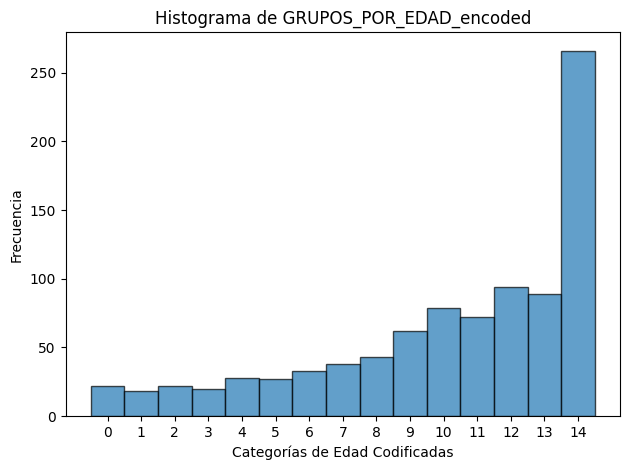

In [ ]:
bin_edges = np.arange(df_diag["GRUPOS_POR_EDAD_encoded"].min() - 0.5, df_diag["GRUPOS_POR_EDAD_encoded"].max() + 1.5)

plt.hist(df_diag["GRUPOS_POR_EDAD_encoded"], bins=bin_edges, edgecolor='black', alpha=0.7)

bin_labels = [str(i) for i in range(df_diag["GRUPOS_POR_EDAD_encoded"].nunique())]

plt.xticks(np.arange(len(bin_labels)), bin_labels)

plt.xlabel("Categorías de Edad Codificadas")
plt.ylabel("Frecuencia")
plt.title("Histograma de GRUPOS_POR_EDAD_encoded")

plt.tight_layout()
plt.show()


Ahora veremos el boxplot

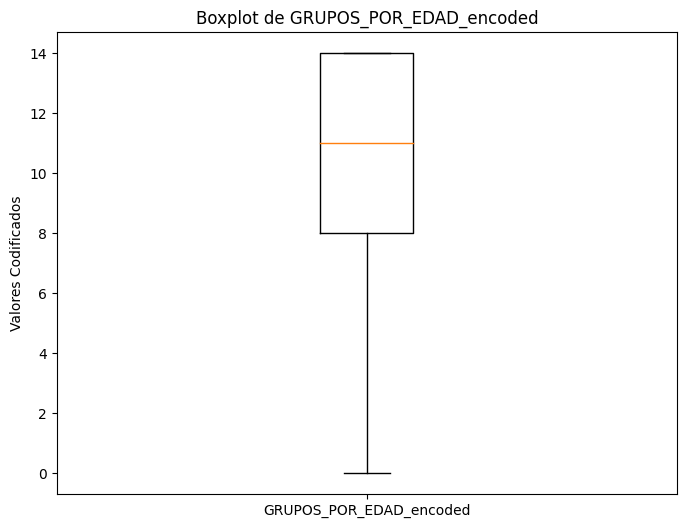

In [ ]:

plt.figure(figsize=(8, 6))  # Tamaño del gráfico

# Boxplot
plt.boxplot(df_diag["GRUPOS_POR_EDAD_encoded"])

# Establecer etiquetas
plt.xticks([1], ["GRUPOS_POR_EDAD_encoded"])  # Etiqueta del eje x

# Título y etiquetas de ejes
plt.title("Boxplot de GRUPOS_POR_EDAD_encoded")
plt.ylabel("Valores Codificados")

# Mostrar el gráfico
plt.show()


Ahora veremos si hay valores que no pertenecen ni a F ni M en el feature de sexo.

In [ ]:
#Comprobamos que solo haya M o F
elementos_unicos = (df_diag["SEXO"].unique())

# Imprimir la lista de elementos únicos
print(elementos_unicos)

['FEMENINO' 'MASCULINO']


Podemos ver que solo hay MASCULINOS Y FEMENINOS, entonces ploteamos para ver si hay una buena distribucion

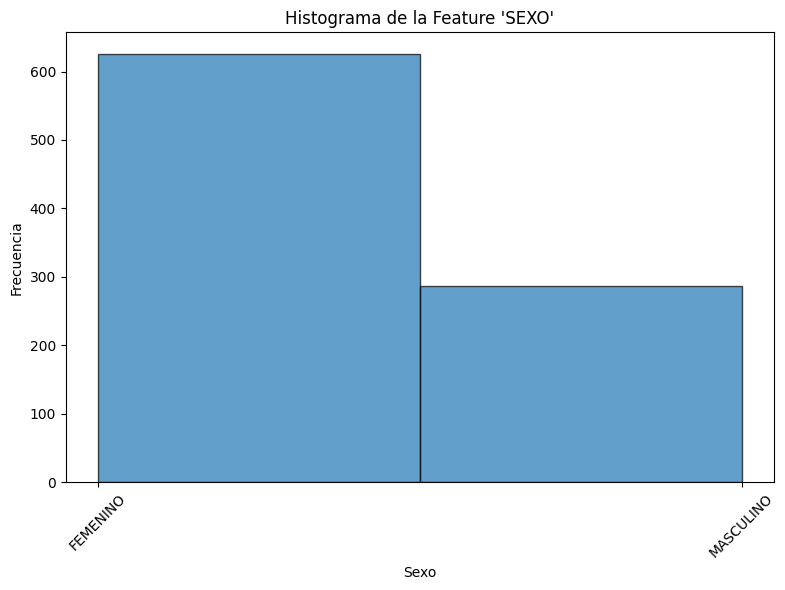

In [ ]:
# Crear un histograma de la feature "SEXO"
plt.figure(figsize=(8, 6))  # Tamaño del gráfico

# Histograma
plt.hist(df_diag["SEXO"], bins=2, edgecolor='black', alpha=0.7)

# Establecer etiquetas
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Título y etiquetas de ejes
plt.title("Histograma de la Feature 'SEXO'")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Hay buena distribucion, entonces codificamos el feature porque el hecho que el paciente sea masculino o femenino, si es relevante en muchas enfermedades. Realizamos un encoder one hot encoding poruqe es solo categorico

In [ ]:
df_diag = pd.get_dummies(df_diag, columns=['SEXO'], prefix=['SEXO'])



Ahora analizamos el DIAGNOSTICOS_CIE, veremos la cantidad de elementos unicos

In [ ]:
cantidad_elementos_unicos = df_diag['DIAGNOSTICOS_CIE'].nunique()
print("Cantidad de elementos únicos en DIAGNOSTICOS_CIE:", cantidad_elementos_unicos)


Cantidad de elementos únicos en DIAGNOSTICOS_CIE: 260


Ahora realizaremos un encoder label para DIAGNOSTICOS_CIE porque si le hacemo un one hot encoding, tendriamos muchas columnas puesto que hay muchos valores unicos en nuestr feature DIAGNOSTICOS_CIE

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Aplicar el Label Encoding al feature "DIAGNOSTICOS_CIE"
df_diag['DIAGNOSTICOS_CIE_encoded'] = encoder.fit_transform(df_diag['DIAGNOSTICOS_CIE'])
df_diag = df_diag.drop(columns=['DIAGNOSTICOS_CIE'])
df_diag.head(10)



,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES,GRUPOS_POR_EDAD_encoded,SEXO_FEMENINO,SEXO_MASCULINO,DIAGNOSTICOS_CIE_encoded
73,OTRAS ENFERMEDADES DE TRANSMISIÓN PREDOMINANTE...,4,6,1,0,255
92,VERRUGAS VÍRICAS,4,13,1,0,256
93,VERRUGAS VÍRICAS,5,14,1,0,256
100,VERRUGAS VÍRICAS,4,3,1,0,256
145,DERMATOFITOSIS,6,4,1,0,226
146,DERMATOFITOSIS,5,14,0,1,226
147,DERMATOFITOSIS,5,10,0,1,226
156,DERMATOFITOSIS,20,14,1,0,226
157,DERMATOFITOSIS,8,13,1,0,226
160,DERMATOFITOSIS,8,12,1,0,226


Movemos nuestro target al final, tanmbien codificamos con un label enconder a CATEGORIA_DIAGNOSTICO porque si lo hacemos con one hot, tendriamos muchas columnas extras

In [ ]:

label_encoder = LabelEncoder()
# Aplica la codificación de etiquetas a la columna "CATEGORIA_DIAGNOSTICO" y eliminamos la antigua columna
df_diag['CATEGORIA_DIAGNOSTICO_encoded'] = label_encoder.fit_transform(df_diag['CATEGORIA_DIAGNOSTICO'])
df_diag = df_diag.drop(columns=['CATEGORIA_DIAGNOSTICO'])

#para colocar el target al final
target_column = df_diag.pop("CATEGORIA_DIAGNOSTICO_encoded")

df_diag["CATEGORIA_DIAGNOSTICO_encoded"] = target_column
df_diag.head()


,TOTAL_PACIENTES,GRUPOS_POR_EDAD_encoded,SEXO_FEMENINO,SEXO_MASCULINO,DIAGNOSTICOS_CIE_encoded,CATEGORIA_DIAGNOSTICO_encoded
73,4,6,1,0,255,99
92,4,13,1,0,256,193
93,5,14,1,0,256,193
100,4,3,1,0,256,193
145,6,4,1,0,226,26


Para usar el lazy predict luego:

In [ ]:
!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy

!pip -q install lazypredict

Downloading...
From: https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy
To: /content/cancer_challenge_cl2.csv
100% 123k/123k [00:00<00:00, 88.9MB/s]


Usaremos al KNN classifier,  haremos un standar scalar , dividiremos el 30% de nuestra dataapara el testeo y el 70% restante para el training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Separar características (X) y objetivo (y)
X = df_diag.drop(['CATEGORIA_DIAGNOSTICO_encoded'], axis=1)
y = df_diag['CATEGORIA_DIAGNOSTICO_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
          10       0.06      0.20      0.09         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.38      0.60      0.46         5
          19       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         2
 

Podemos ver que obtenemos un accuracy muy bajo, Ahora veremos que pasa si colocamos a DIAGNOSTICOS_CIE_encoded como target, y solo a CATEGORIA_DIAGNOSTICO_encoded como feature

Ahora probamos con otro target, esta vez usaremos al DIAGNOSTICOS_CIE_encoded como target y a CATEGORIA_DIAGNOSTICO_encoded	 como feature

In [ ]:
X = df_diag['CATEGORIA_DIAGNOSTICO_encoded']
y = df_diag['DIAGNOSTICOS_CIE_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Crear un modelo de Clasificación con Vecinos Más Cercanos (KNN)


X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

scaler=StandardScaler()


X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


model = KNeighborsClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       0.75      1.00      0.86         3
           5       0.40      1.00      0.57         2
           6       0.00      0.00      0.00         2
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.17      1.00      0.29         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          17       0.50      1.00      0.67         3
          18       1.00      1.00      1.00         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.29      1.00      0.44         2
 

Podemos ver que el accuracy sube hasta 50%. Ahora probaremos al reves, con nuestro target original

In [ ]:
X = df_diag['DIAGNOSTICOS_CIE_encoded']
y = df_diag['CATEGORIA_DIAGNOSTICO_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Crear un modelo de Clasificación con Vecinos Más Cercanos (KNN)


X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

scaler=StandardScaler()


X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


model = KNeighborsClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.60      1.00      0.75         3
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
          10       1.00      0.80      0.89         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         5
          19       1.00      1.00      1.00         4
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         0
          26       0.50      1.00      0.67         2
 

Podemos notar que sube hasta un **64**%. Ahora, usando el lazy predict, vemos que con el random forest obtenemos hasta **86%**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Supongamos que tienes un DataFrame llamado df_diag con tus datos

# Separar características (X) y objetivo (y)
X = df_diag[['DIAGNOSTICOS_CIE_encoded']]
y = df_diag[['CATEGORIA_DIAGNOSTICO_encoded']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Crear un modelo de LazyClassifier y evaluar los modelos
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models


 90%|████████▉ | 26/29 [00:12<00:00,  3.13it/s]

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

100%|██████████| 29/29 [00:24<00:00,  1.18it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.86,0.76,None,0.83,0.62
DecisionTreeClassifier,0.86,0.76,None,0.83,0.05
ExtraTreesClassifier,0.86,0.76,None,0.84,0.79
ExtraTreeClassifier,0.86,0.76,None,0.83,0.08
BaggingClassifier,0.83,0.73,None,0.80,0.23
GaussianNB,0.70,0.65,None,0.66,0.12
NearestCentroid,0.55,0.60,None,0.53,0.12
LGBMClassifier,0.71,0.54,None,0.67,12.09
KNeighborsClassifier,0.64,0.46,None,0.57,0.07


Con estos datos podemos concluir que los features brindados no son muy utiles al moomento de clasificar. Por ejemplo, desde lasprimeras lineas de codigo tuvimos que eliminar featires que eran constantes en todas las filas, y no aportaban nada. Ademas hay muchos diagnosticos que soo tienen una incidencia, por lo que no beneficia al algoritmo. Ademaseste algoritmo creado puede ser util si es que en una base de datos solo esta el diagnostico CIE, y se desea categorizar el diagnostico.